# Exploratory Data Analysis (EDA)


# Steps taken to visualise data:

1. Choose the variables that will help predict whether an anime will have another season. The variables we chose are "Score", "Ranked", "Members", "Favorites" and "Completed".
2. For each variable, choose the most appropriate method to display the data. eg. BoxPlot, CatPlot etc



In [3]:
# Basic Libraries
import math
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [4]:
animedata = pd.read_csv('animeTV_EDA.csv')

<AxesSubplot:xlabel='HasSequel', ylabel='Score'>

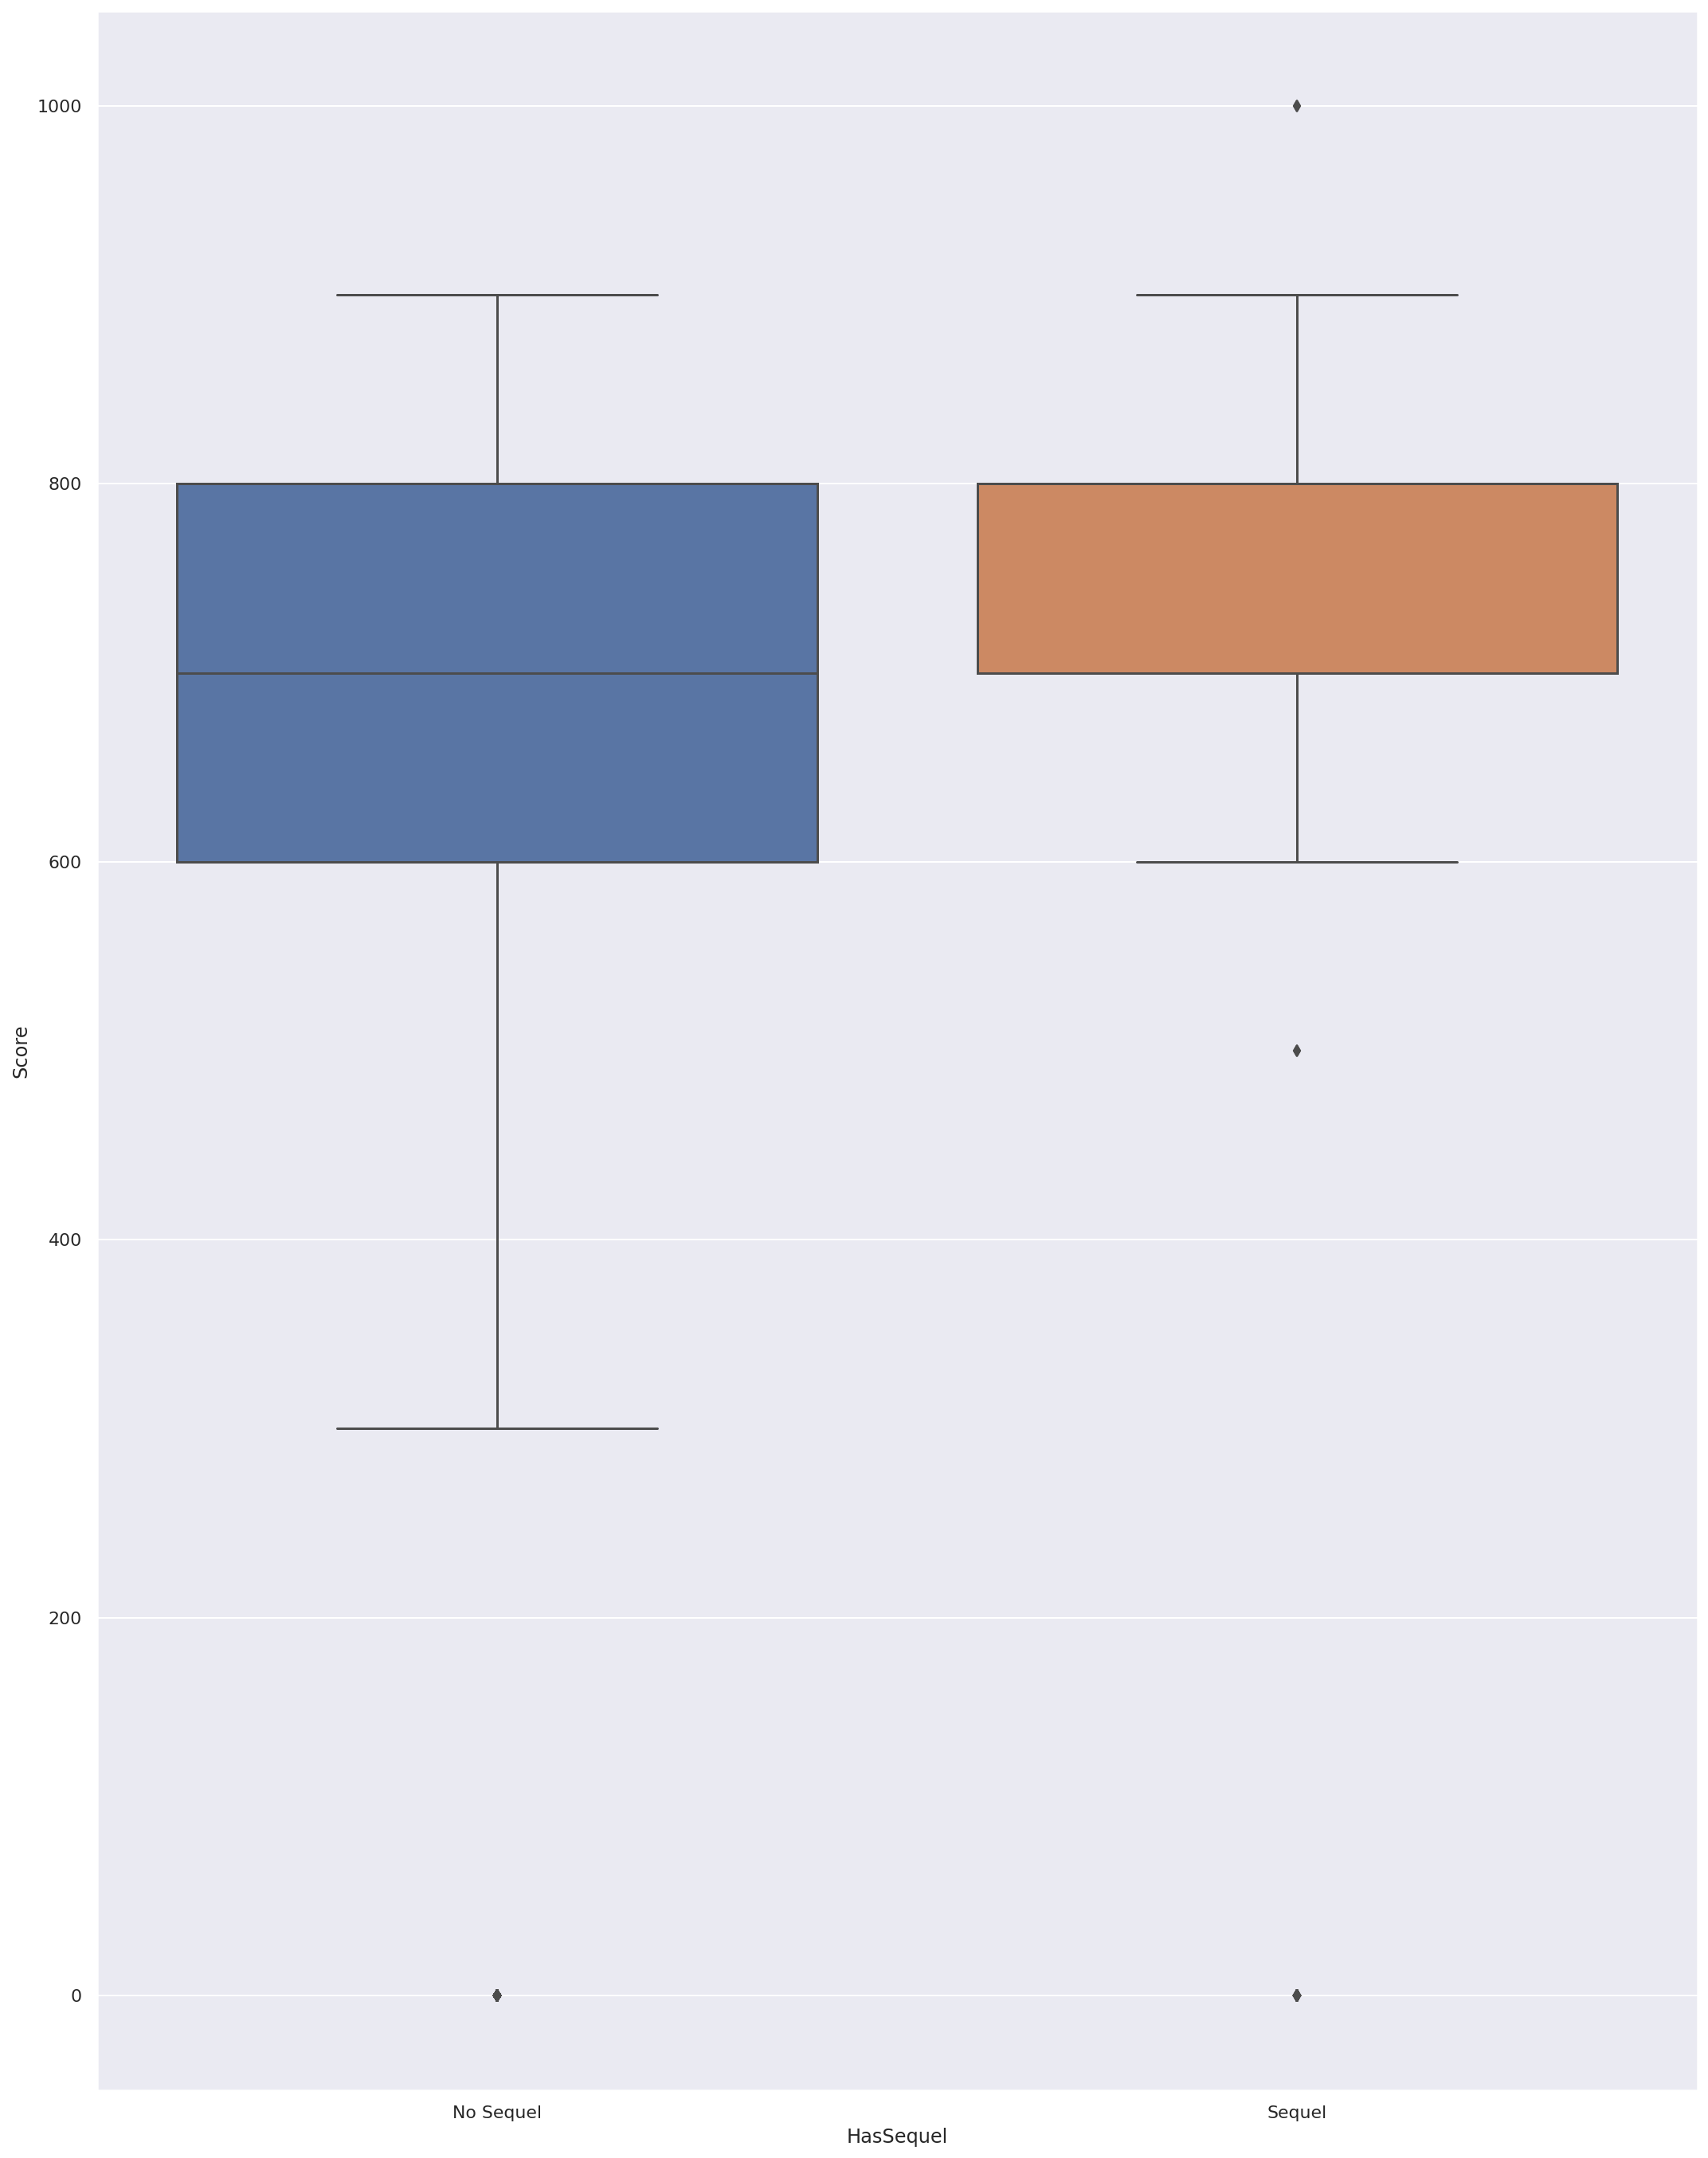

In [3]:
f, axes = plt.subplots(1, 1, figsize=(18, 24))
sb.boxplot(x = 'HasSequel', y = 'Score', data = animedata, ax = axes)

## We can tell from the figure above that animes with sequels tend to have better scores with users. This is due to the box and whisker plots being narrower and being positioned closer to the max score. It also has a lower Q1 score and a higher mean score.



<AxesSubplot:xlabel='HasSequel', ylabel='Ranked'>

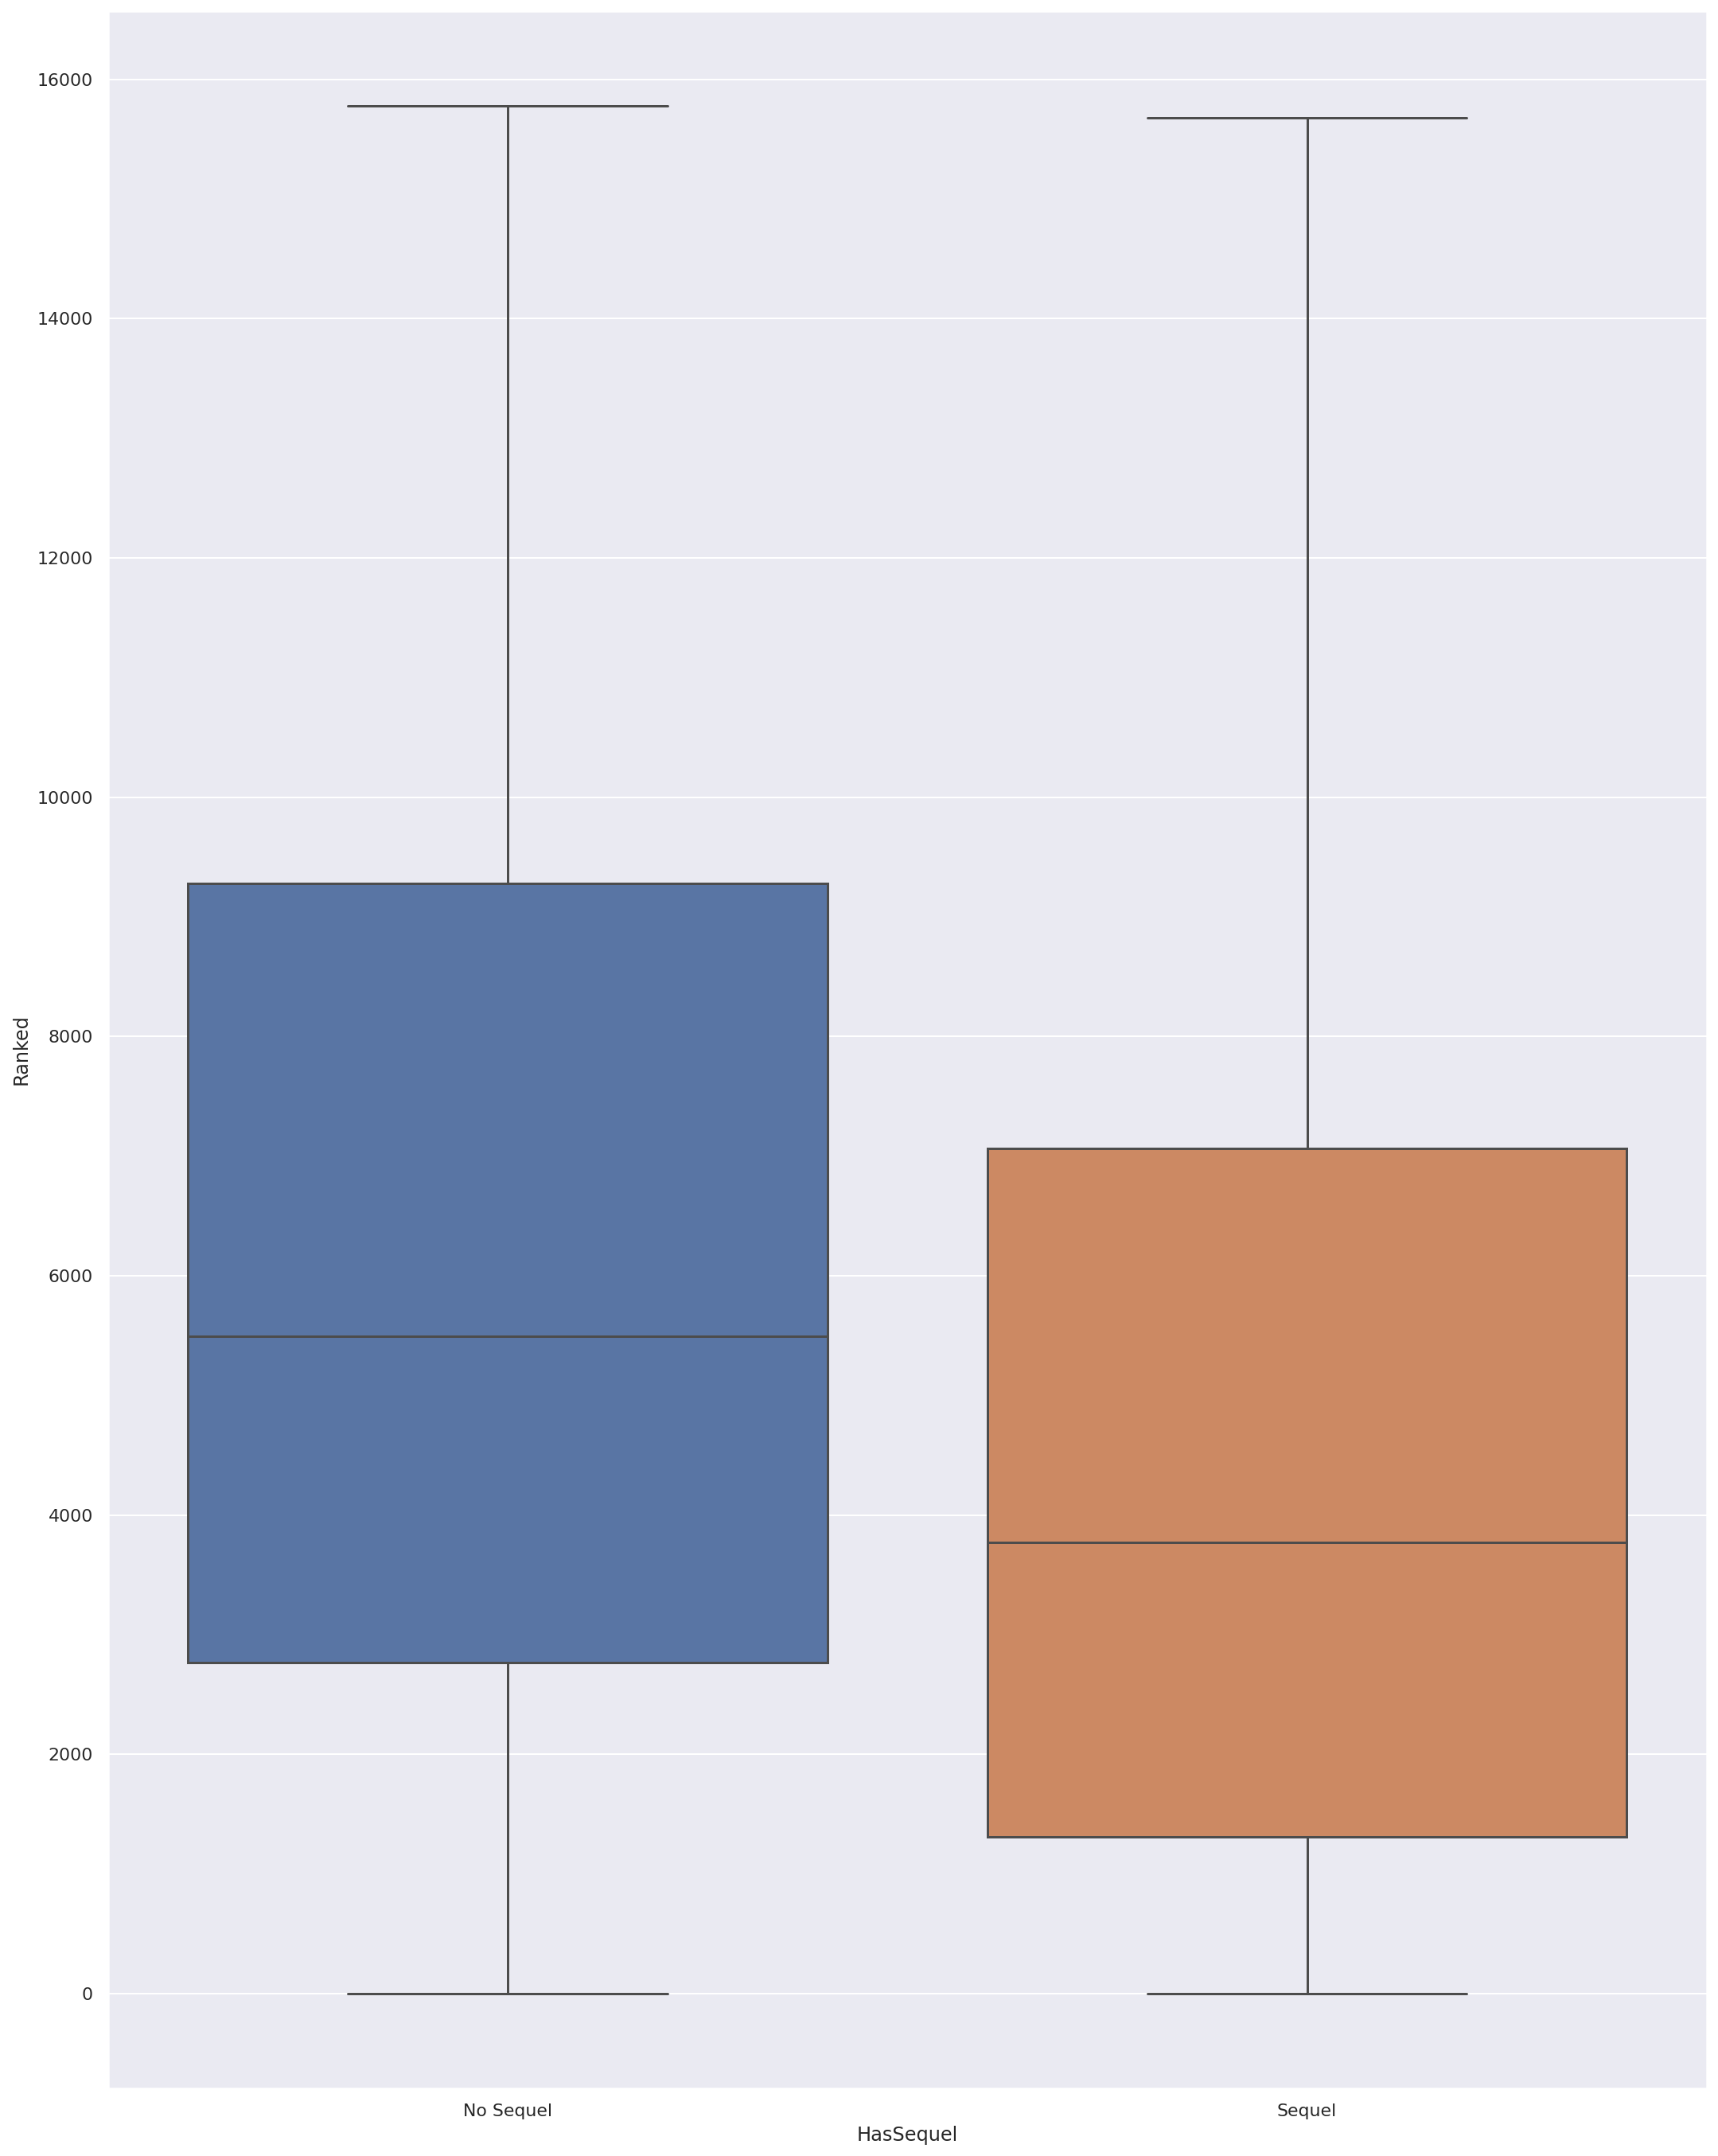

In [6]:
def haha(x):
    result = 0;
    try:
        result = float(x)
    except:
        result = 0
    return math.ceil(result)
animedata["Ranked"] = animedata["Ranked"].apply(haha)
f, axes = plt.subplots(1, 1, figsize=(18, 24))
sb.boxplot(x = 'HasSequel', y = 'Ranked', data = animedata, ax = axes)

In [7]:
def RemoveOutliers(data, col1, col2):
    dataQ1 = data[col1].quantile(0.25)
    dataQ3 = data[col1].quantile(0.75)

    data2Q1 = data[col2].quantile(0.25)
    data2Q3 = data[col2].quantile(0.75)


    ''' Detection '''
    dataIQR = dataQ3 - dataQ1
    data2IQR = data2Q3 - data2Q1

    print("Old Shape: ", data.shape)

    # Upper bound
    data1upper = np.where(data[col1] >= (dataQ3+1.5*dataIQR))
    # Lower bound
    data1lower = np.where(data[col1] <= (dataQ1-1.5*dataIQR))

    # Upper bound
    data2upper = np.where(data[col2] >= (data2Q3+1.5*data2IQR))
    # Lower bound
    data2lower = np.where(data[col2] <= (data2Q1-1.5*data2IQR))

    #Get intersection of both column outliers
    dataupper = np.intersect1d(data1upper[0], data2upper[0])
    datalower = np.intersect1d(data1lower[0], data2lower[0])

    #dataupper = pd.merge(data1upperDF, data2upperDF, how='inner')
    #datalower = pd.merge(data1lowerDF, data2lowerDF, how='inner')

    ''' Removing the Outliers '''
    data = data.drop(dataupper, inplace = False, errors='ignore')
    data = data.drop(datalower, inplace = False, errors='ignore')


    print("New Shape: ", data.shape)
    return data

In [8]:
animedata_noOutliers = RemoveOutliers(animedata, "Members", "Favorites")
print("Anime Shape: ", animedata.shape)
print("Anime Copy Shape: ", animedata_noOutliers.shape)
#RemoveOutliers(animedata, "Members", "Favorites")

Old Shape:  (2810, 55)
New Shape:  (2484, 55)
Anime Shape:  (2810, 55)
Anime Copy Shape:  (2484, 55)


<AxesSubplot:xlabel='isManga', ylabel='count'>

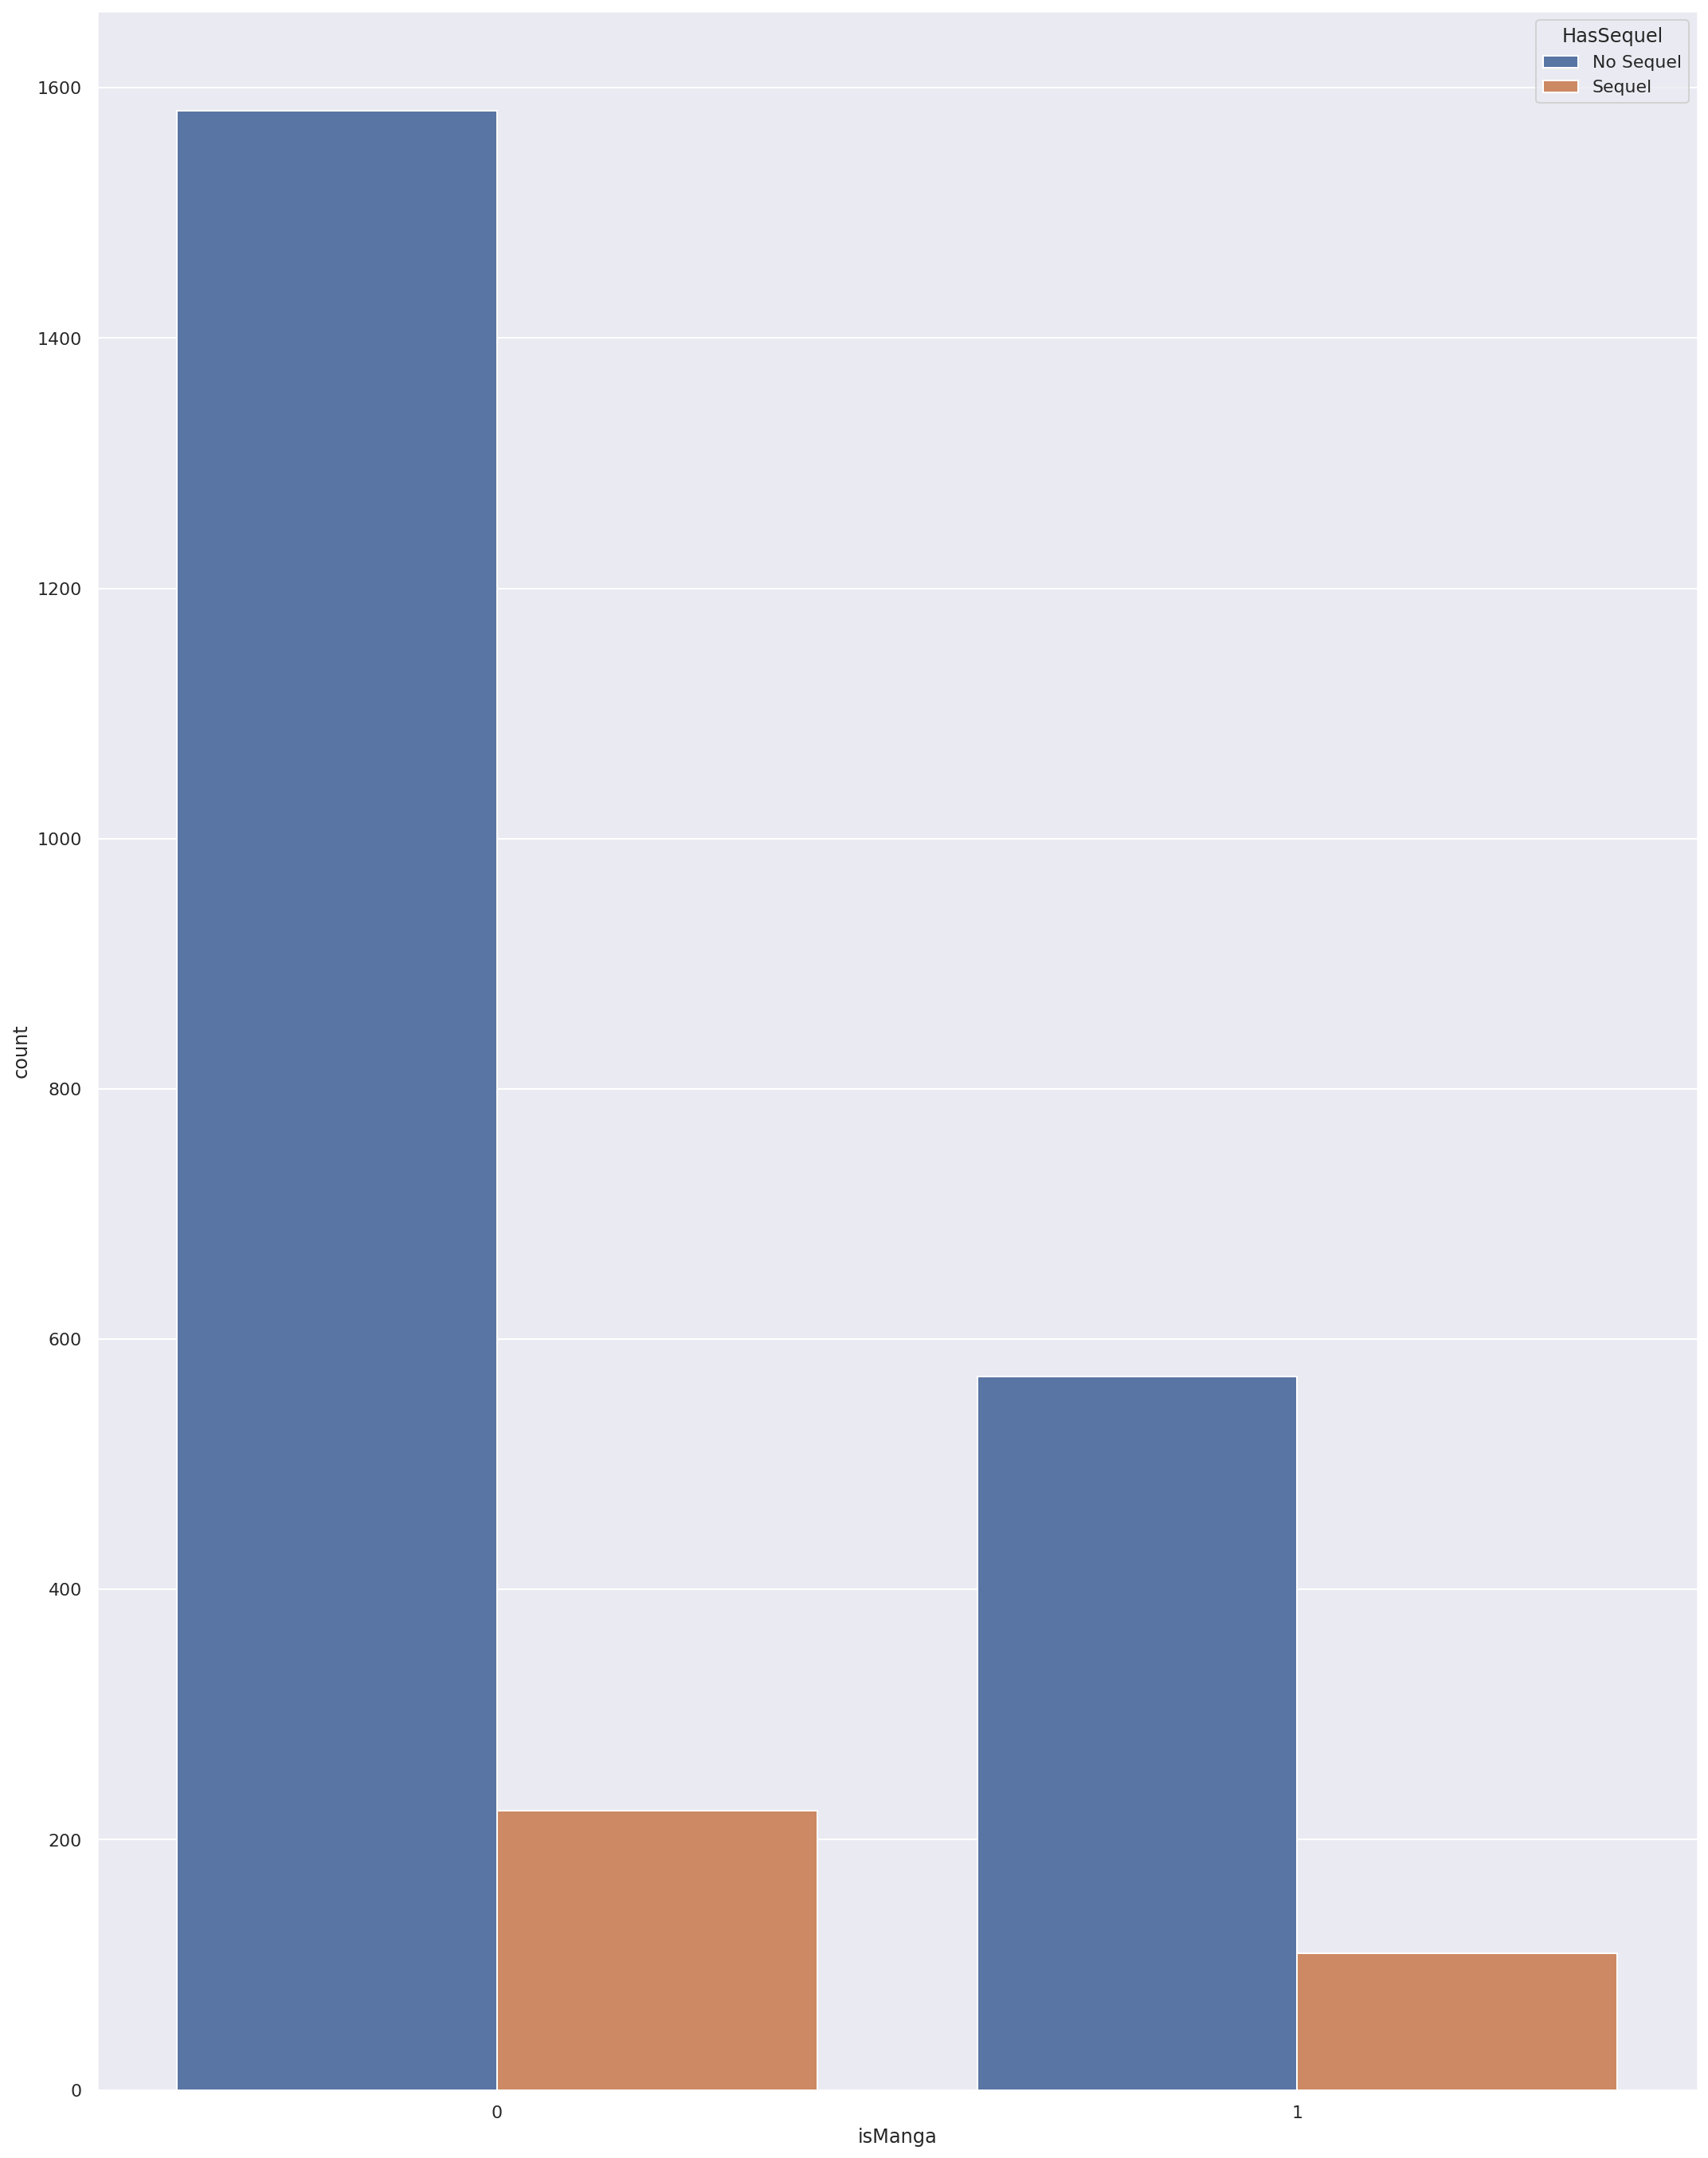

In [11]:
f, axes = plt.subplots(1, 1, figsize=(18, 24))
sb.countplot(x="isManga", hue="HasSequel", data=animedata_noOutliers)

In [17]:
#animedata_noOutliers.groupby(["isManga"]).head(n=-1)

# Plot the isManga crashes
#sb.set_color_codes("pastel")
#sb.barplot(x="HasSequel", y="value", data=hasSequelCounts,
#            label="Total", color="b")
animedata_noOutliers.groupby(["isManga"]).head(n=-1)

,Unnamed: 0,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,...,Manga,Music,Novel,Original,Other,Picture book,Radio,Unknown,Visual novel,Web manga
2,3,7,Witch Hunter Robin,800,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",...,0,0,0,1,0,0,0,0,0,0
3,4,8,Bouken Ou Beet,700,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,1,0,0,0,0,0,0,0,0,0
4,5,15,Eyeshield 21,800,"Action, Sports, Comedy, Shounen",Unknown,アイシールド21,TV,145,"Apr 6, 2005 to Mar 19, 2008",...,1,0,0,0,0,0,0,0,0,0
6,7,17,Hungry Heart: Wild Striker,800,"Slice of Life, Comedy, Sports, Shounen",Unknown,ハングリーハート Wild Striker,TV,52,"Sep 11, 2002 to Sep 10, 2003",...,1,0,0,0,0,0,0,0,0,0
10,12,22,Tennis no Ouji-sama,800,"Action, Comedy, Sports, School, Shounen",The Prince of Tennis,テニスの王子様,TV,178,"Oct 10, 2001 to Mar 23, 2005",...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2803,17554,48470,D_Cide Traumerei,0,"Action, Adventure, Drama, Magic, Fantasy",Unknown,D_CIDE TRAUMEREI（ディーサイドトロイメライ）,TV,Unknown,"Jul, 2021 to ?",...,0,0,0,1,0,0,0,0,0,0
2804,17561,48492,Scarlet Nexus,0,"Action, Fantasy",Unknown,SCARLET NEXUS,TV,Unknown,"Jul, 2021 to ?",...,0,0,0,0,0,0,0,0,0,0
2805,265,289,Comic Party,700,"Comedy, Drama",Comic Party,こみっくパーティー,TV,13,"Apr 2, 2001 to Jun 25, 2001",...,0,0,0,0,0,0,0,0,1,0
2806,651,706,Comic Party Revolution,700,"Comedy, Drama",Unknown,こみっくパーティー Revolution,TV,13,"Apr 4, 2005 to Jun 27, 2005",...,0,0,0,0,0,0,0,0,1,0
